# ЗАДАНИЕ 1
# Формулы динамической системы:
\begin{cases}
\dot{x} = \sigma(y-x) \\
\dot{y} = x(r-z)-y \\
\dot{z} = xy-bz \\
x(0) = 0 \\
y(0) = 1 \\
z(0) = 1.05 \\
\end{cases}
$при~\sigma = 10, r = 28, b = 8/3$

In [1]:
import numpy as np 

from bokeh.plotting import figure, show
from bokeh.io import output_notebook

from scipy.integrate import solve_ivp

In [2]:
output_notebook()

Loading BokehJS ...

# Численное решение динамической системы

In [3]:
# u = [x, y, z]
u0 = [0.0, 1.0, 1.0]
sigma, r, b = 10.0, 28.0, 8.0/3.0

def func(t, u):
    x, y, z = u
    u_x = sigma*(x - y)
    u_y = x*(r - z) - y
    u_z = x*y - b*z
    return np.array([u_x, u_y, u_z], float)

t_seg = [0, 1]
t = np.linspace(0, 1, 5000)
sol = solve_ivp(func, t_seg, u0, t_eval = t)

# Визуализация траектории динамической системы

In [4]:
p = figure(title="Проекция траектории на ось X")
p.line(t, sol.y[0], line_width=2.5, color="#2222aa")
show(p)

In [5]:
p = figure(title="Проекция траектории на ось Y")
p.line(t, sol.y[1], line_width=2.5, color="#2222aa")
show(p)

In [6]:
p = figure(title="Проекция траектории на ось Z")
p.line(t, sol.y[2], line_width=2.5, color="#2222aa")
show(p)

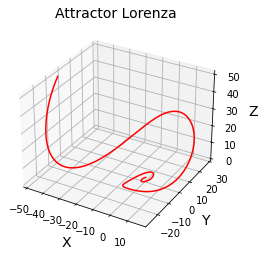

In [7]:
import matplotlib.pyplot as plt
f = plt.figure()
ax = f.gca(projection = '3d')

ax.plot(sol.y[0], sol.y[1], sol.y[2], 'red')
ax.set_xlabel("X", fontsize = 14, fontweight = "regular")
ax.set_ylabel("Y", fontsize = 14, fontweight = "regular")
ax.set_zlabel("Z", fontsize = 14, fontweight = "regular")
ax.set_title("Attractor Lorenza", fontsize = 14, loc = "center")

plt.show()